#### Helper Notebook to check results of the semantic segmentation as well as data handling consistency

In [8]:
import importlib
import src.PrepareData
importlib.reload(src.PrepareData)
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
import json
from glob import glob

def display_img(img_data, dataset_idx, target_filename, show_annot_mask=1, color_space='gray', figsize=(16, 10)):
    """
    Displays an image from the dataset with the given filename, dataset index, and color space.
    :param img_data: The image data to display.
    :param dataset_idx: The index of the dataset to display the image from.
    :param target_filename: The filename of the image to display.
    :param show_annot_mask: Whether to show the annotated mask or not.
    :param color_space: The color space to display the image in.
    :param figsize: The size of the figure to display.
    """
    def find_image_idx(img_data, dataset_idx, target_filename):
        for image_idx, image_info in enumerate(img_data[dataset_idx]):
            if image_info[2] == target_filename:
                return image_idx
        return None
    
    def plot_img(img_data, dataset_idx, image_idx, show_annot_mask, color_space, figsize):
        plt.figure(figsize=figsize)
        image = img_data[dataset_idx][image_idx][show_annot_mask]
        if color_space == 'gray' or color_space == 'grey':
            plt.imshow(image, cmap='gray')
        elif color_space == 'rgb' and show_annot_mask == 1:
            image_rgb = color.lab2rgb(image)
            plt.imshow(image_rgb)

        plt.axis('off')
        dataset = img_data[dataset_idx][image_idx][4].split('/')[-1]
        plt.title(f"{img_data[dataset_idx][image_idx][2]}, {dataset}, Image {image_idx}, Color Space: {color_space}")
        plt.show()

    # Find the image index
    image_idx = find_image_idx(img_data, dataset_idx, target_filename)
    if image_idx is not None:
        plot_img(img_data, dataset_idx, image_idx, show_annot_mask, color_space, figsize)
    else:
        print(f"Image {target_filename} not found in dataset {dataset_idx}")
    
    return image_idx

In [6]:
with open('config.json', 'r') as f:
    config = json.load(f)

prepare_data = src.PrepareData.PrepareData(dataset=config["dataset"], n_splits=config["n_splits"], random_state=config["random_state"], local=config["local"])
trainval, trainval_names, trainval_labelmasks, trainval_idxs, test, test_names, test_labelmasks, test_idxs, data_list, dfs_img_has_mask, df_trainval, df_test, folds = (
    prepare_data.trainval,
    prepare_data.trainval_names,
    prepare_data.trainval_labelmasks,
    prepare_data.trainval_idxs,
    prepare_data.test,
    prepare_data.test_names,
    prepare_data.test_labelmasks,
    prepare_data.test_idxs,
    prepare_data.data_list,
    prepare_data.dfs_img_has_mask,
    prepare_data.df_train_val,
    prepare_data.df_test,
    prepare_data.folds
)

Fraction of images in datasets Europe_Lab_Data containing no welding nugget, per dataset: [('Europe_Lab_Data_1', 0.0), ('Europe_Lab_Data_4', 0.0), ('Europe_Lab_Data_5', 0.048), ('Europe_Lab_Data_6', 0.0636042402826855), ('Europe_Lab_Data_7', 0.20454545454545456), ('Europe_Lab_Data_10', 0.1103448275862069)]
Fraction of images in datasets lab_rsw_segmentation containing no welding nugget, per dataset: [('lab_rsw_segmentation_1', 0.12666666666666668), ('lab_rsw_segmentation_2', 0.13445378151260504), ('lab_rsw_segmentation_3', 0.45), ('lab_rsw_segmentation_4', 0.3225806451612903), ('lab_rsw_segmentation_5', 0.05), ('lab_rsw_segmentation_8', 0.0), ('lab_rsw_segmentation_9', 0.08620689655172414), ('lab_rsw_segmentation_10', 0.22413793103448276), ('lab_rsw_segmentation_11', 0.0)]


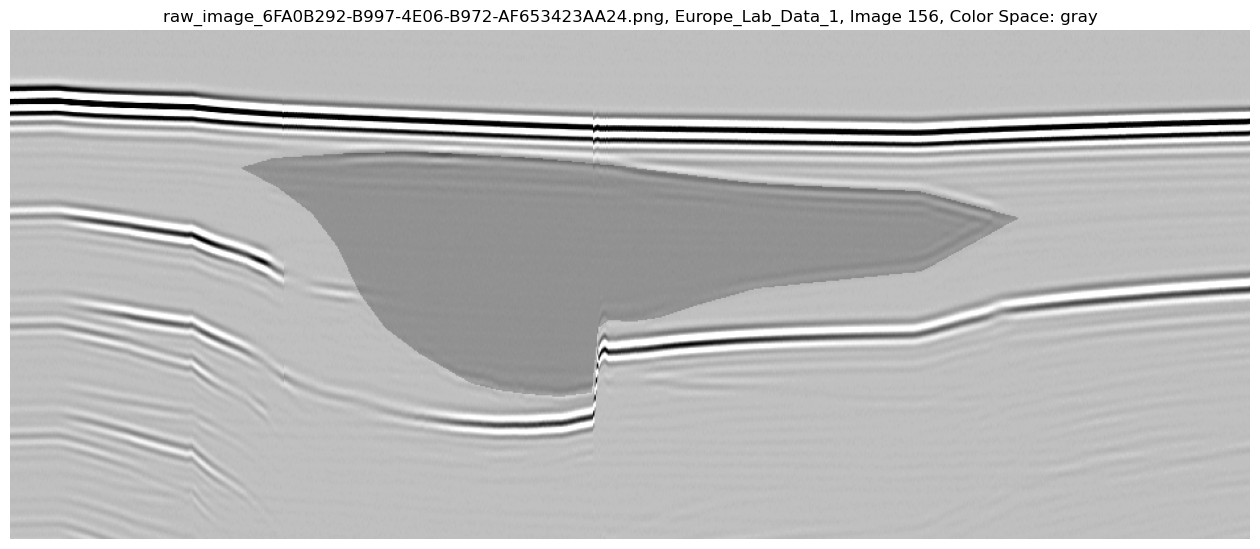

156

In [10]:
display_img(data_list[0], 0, data_list[0][0][156][2],show_annot_mask=1, color_space='gray')